# Demo

In [ ]:
! nvidia-smi

In [ ]:
! git clone https://github.com/microsoft/GLIP.git
%cd GLIP
! git checkout c663d9db8a503e04c6b76cd2e14152bab775d28a
! pip install torch==1.9.0 torchvision  torchaudio
! pip install einops shapely timm yacs tensorboardX ftfy prettytable pymongo
! pip install transformers


In [ ]:
! python3 setup.py build develop --user
! mkdir MODEL

In [ ]:
! pip install nltk inflect pycocotools

In [ ]:
%cd GLIP

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np
pylab.rcParams['figure.figsize'] = 20, 12
from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.engine.predictor_glip import GLIPDemo

# Use this command for evaluate the GLPT-T model
! wget https://huggingface.co/GLIPModel/GLIP/resolve/main/glip_tiny_model_o365_goldg_cc_sbu.pth?download=true -O MODEL/glip_tiny_model_o365_goldg_cc_sbu.pth
config_file = "configs/pretrain/glip_Swin_T_O365_GoldG.yaml"
weight_file = "MODEL/glip_tiny_model_o365_goldg_cc_sbu.pth"

# Use this command to evaluate the GLPT-L model
# ! wget https://penzhanwu2bbs.blob.core.windows.net/data/GLIPv1_Open/models/glip_large_model.pth -O MODEL/glip_large_model.pth
# config_file = "configs/pretrain/glip_Swin_L.yaml"
# weight_file = "MODEL/glip_large_model.pth"

# update the config options with the config file
# manual override some options
cfg.local_rank = 0
cfg.num_gpus = 1
cfg.merge_from_file(config_file)
cfg.merge_from_list(["MODEL.WEIGHT", weight_file])
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

In [ ]:
glip_demo = GLIPDemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
    show_mask_heatmaps=True
)

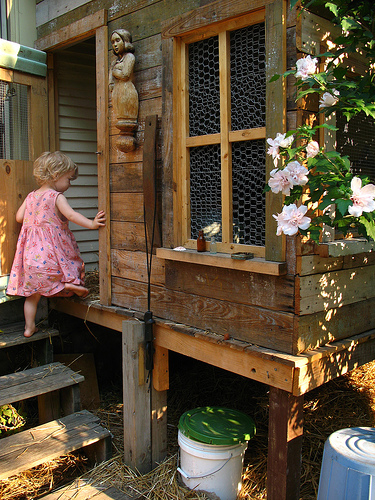

In [36]:
img_path = '/work/adapting-CLIP-VGPs/data/flickr/flickr30k_images/1000268201.jpg'
img = Image.open(img_path).convert("RGB")

def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

img_data = np.array(img)[:, :, [2, 1, 0]]

img.show()

'''
Captions:
1000268201.jpg| 0| A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201.jpg| 1| A little girl in a pink dress going into a wooden cabin .
1000268201.jpg| 2| A little girl climbing the stairs to her playhouse .
1000268201.jpg| 3| A little girl climbing into a wooden playhouse 
1000268201.jpg| 4| A girl going into a wooden building .
'''
phrases = ['playhouse', 'building']

In [37]:
def imshow(img, caption):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    plt.figtext(0.5, 0.09, caption, wrap=True, horizontalalignment='center', fontsize=20)

# image = load('http://farm4.staticflickr.com/3693/9472793441_b7822c00de_z.jpg')
# caption = 'bobble heads on top of the shelf'
top_pred = model.inference(img_data,'child')
print(top_pred.bbox)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3825: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")


inference time per image: 0.33690959960222244
tensor([], size=(0, 4))


# VGP identification

In [1]:
%cd GLIP

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np
pylab.rcParams['figure.figsize'] = 20, 12
from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.engine.predictor_glip import GLIPDemo

# Use this command for evaluate the GLPT-T model
# ! wget https://huggingface.co/GLIPModel/GLIP/resolve/main/glip_tiny_model_o365_goldg_cc_sbu.pth?download=true -O MODEL/glip_tiny_model_o365_goldg_cc_sbu.pth
config_file = "configs/pretrain/glip_Swin_T_O365_GoldG.yaml"
weight_file = "MODEL/glip_tiny_model_o365_goldg_cc_sbu.pth"

# Use this command to evaluate the GLPT-L model
# ! wget https://penzhanwu2bbs.blob.core.windows.net/data/GLIPv1_Open/models/glip_large_model.pth -O MODEL/glip_large_model.pth
# config_file = "configs/pretrain/glip_Swin_L.yaml"
# weight_file = "MODEL/glip_large_model.pth"

# update the config options with the config file
# manual override some options
cfg.local_rank = 0
cfg.num_gpus = 1
cfg.merge_from_file(config_file)
cfg.merge_from_list(["MODEL.WEIGHT", weight_file])
cfg.merge_from_list(["MODEL.DEVICE", "cuda:6"])

/work/adapting-CLIP-VGPs/GLIP


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
from utils.vgp_data import FlickrVGPsDataset
from torch.utils.data import DataLoader

test_dataset = FlickrVGPsDataset(data_type='test')
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=100,
    shuffle=False,
    num_workers=0,
    pin_memory=True
)

In [34]:
model = GLIPDemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
    show_mask_heatmaps=False
)

VISION BACKBONE USE GRADIENT CHECKPOINTING:  False
LANGUAGE BACKBONE USE GRADIENT CHECKPOINTING:  False


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'bert.pooler.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B


In [23]:
batch_iter = iter(test_loader)
batch = next(batch_iter)
batch = next(batch_iter)
# indices = batch['idx']
image_indices = batch['image_idx']
images = batch['image']
phrase_pairs = [list(phrase_pair) for phrase_pair in zip(batch['phrases'][0],batch['phrases'][1])]
labels = batch['label']

In [24]:
def imshow(img, caption=''):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    plt.figtext(0.5, 0.09, caption, wrap=True, horizontalalignment='center', fontsize=20)

## BBox

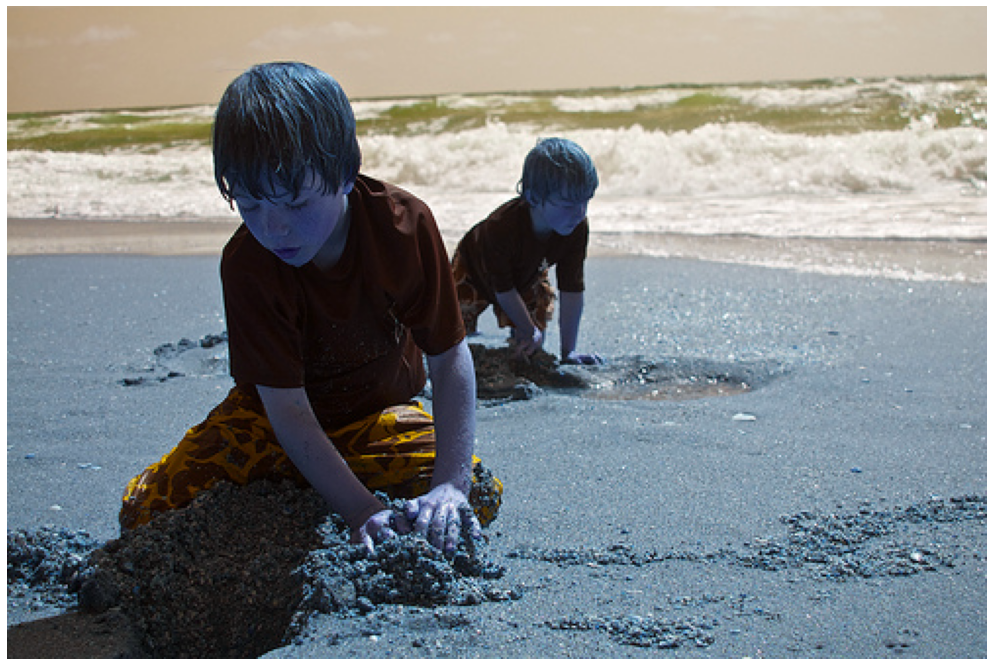

In [32]:
img_path = f'/work/adapting-CLIP-VGPs/data/flickr/flickr30k_images/{image_indices[90]}.jpg'
demo_img = Image.open(img_path).convert("RGB")

demo_img = np.array(demo_img)
imshow(demo_img)

In [26]:
demo_phrases = phrase_pairs[90]
print(demo_phrases)

['a beach', 'sand']


In [27]:
# import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

preds1 = model.compute_prediction(demo_img, demo_phrases[0])
preds2 = model.compute_prediction(demo_img, demo_phrases[1])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3825: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")


inference time per image: 0.28082986176013947
inference time per image: 0.3840502128005028


In [31]:
print(preds1.bbox)

tensor([], size=(0, 4))


In [21]:
def calculate_iou(box1, box2):
    # Extract coordinates of the bounding boxes
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Calculate coordinates of the intersection area
    x_intersection = max(x1, x2)
    y_intersection = max(y1, y2)
    w_intersection = max(0, min(x1 + w1, x2 + w2) - x_intersection)
    h_intersection = max(0, min(y1 + h1, y2 + h2) - y_intersection)

    # Calculate area of intersection and union
    area_intersection = w_intersection * h_intersection
    area_union = w1 * h1 + w2 * h2 - area_intersection

    # Calculate IoU
    iou = area_intersection / max(area_union, 1e-10)  # To avoid division by zero

    return iou

In [22]:
# Example usage:
box1 = (10, 10, 30, 30)  # (x, y, width, height)
box2 = (20, 20, 30, 30)

iou_value = calculate_iou(box1, box2)
print(f"IoU: {iou_value}")

IoU: 0.2857142857142857


inference time per image: 0.26369987428188324


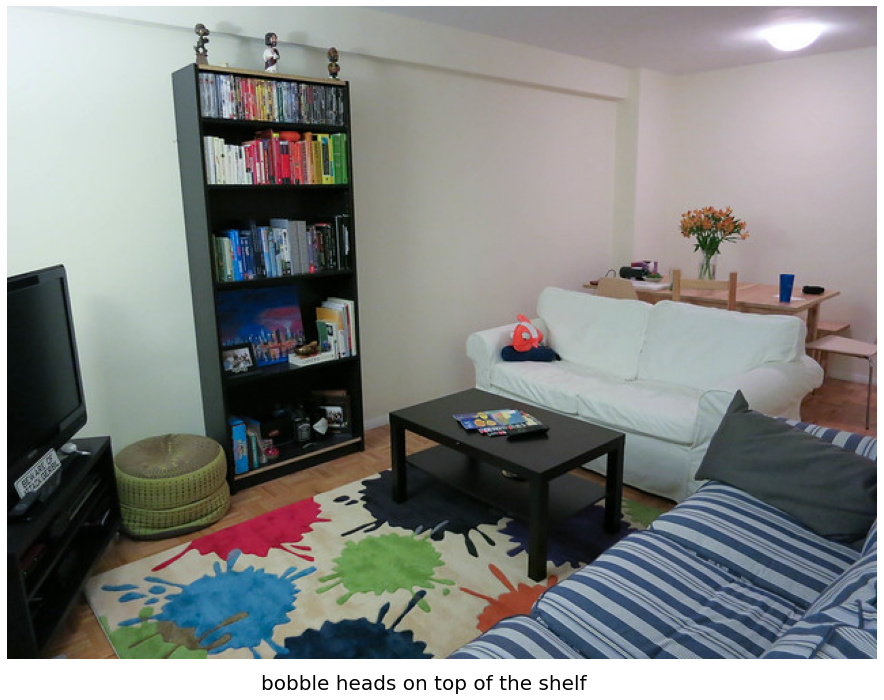

In [35]:

def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

image = load('http://farm4.staticflickr.com/3693/9472793441_b7822c00de_z.jpg')
caption = 'bobble heads on top of the shelf'
result, _ = model.run_on_web_image(image, caption, 0.5)
imshow(result, caption)